# Visualize the SBL prior model  

In [1]:
# Import module. 
using Revise
using PriorNormalization

In [21]:
# Import packages. 
using Distributions
using LaTeXStrings
using Plots: Plots, plot, plot!, scatter, scatter!, savefig, surface, surface!
Plots.pyplot()

Plots.PyPlotBackend()

## Parameters of the generalized gamma hyper-prior

In [3]:
# power parameters
r_range = [ 1.0, .5, -.5, -1.0 ]; 
# shape parameters 
β_range = [ 1.501, 3.0918, 2.0165, 1.0017 ]; 
# rate parameters 
ϑ_range = [ 5*10^(-2), 5.9323*10^(-3), 1.2583*10^(-3), 1.2308*10^(-4) ]; 

## Plot the generalized gamma hyper-prior 

In [4]:
function hyper_prior(θ; r=1.0, β=1.501, ϑ=5*10^(-2)) 
    distr = GeneralizedGamma(r, β, ϑ) # set-up the generalized gamma distribution 
    logPDF = logpdf( distr, θ ) # get its log-PDF 
    return exp( logPDF ) # return the PDF 
end

hyper_prior (generic function with 1 method)

In [5]:
# Create a grid of points
θ_range = 10 .^ range( -5, stop=0, length=100 )
hyperPrior_values = zeros( length(θ_range), 4 )
hyperPrior_values = [ hyper_prior( θ; r=r_range[i], β=β_range[i], ϑ=ϑ_range[i] ) for θ in θ_range, i in [1,2,3,4] ]

100×4 Matrix{Float64}:
 0.316372     1.13626       87.3687          5.58688
 0.335344     1.20777      130.352          17.0965
 0.355452     1.28358      187.645          45.1043
 0.376765     1.36393      261.149         104.274
 0.399355     1.44908      352.047         214.329
 0.423297     1.53928      460.529         396.764
 0.448672     1.63478      585.59          669.15
 0.475565     1.73587      724.95         1038.71
 0.504068     1.84283      875.095        1497.63
 0.534275     1.95594     1031.47         2021.93
 0.566288     2.07551     1188.76         2574.65
 0.600214     2.20184     1341.28         3112.07
 0.636166     2.33525     1483.39         3591.23
 ⋮                                        
 0.204198     0.335091       0.00721522      0.00156975
 0.108966     0.236951       0.00573419      0.00124381
 0.0534288    0.163491       0.00455619      0.000985547
 0.0238214    0.109908       0.00361946      0.000780905
 0.00954498   0.0718764      0.00287477      0.0

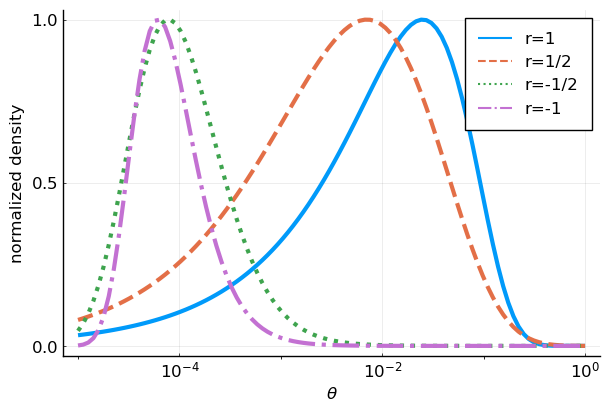

"/Users/janglaubitz/src/2024_priorNormalization_dev/PriorNormalization.jl/notebooks/PDF_hyper_prior.pdf"

In [6]:
# Set tick locations and labels
xticks = [10^(-4), 10^(-2), 1]
yticks = [0, 1/2, 1]

# Create the plot 
plot_hyperPrior = plot( θ_range, hyperPrior_values[:,1]./maximum(hyperPrior_values[:,1]); 
    label="r=1", lw=3, ls=:solid )
plot!( plot_hyperPrior, θ_range, hyperPrior_values[:,2]./maximum(hyperPrior_values[:,2]); 
    label="r=1/2", lw=3, ls=:dash )
plot!( plot_hyperPrior, θ_range, hyperPrior_values[:,3]./maximum(hyperPrior_values[:,3]); 
    label="r=-1/2", lw=3, ls=:dot )
plot!( plot_hyperPrior, θ_range, hyperPrior_values[:,4]./maximum(hyperPrior_values[:,4]); 
    label="r=-1", lw=3, ls=:dashdot ) 
# Make some cosmetic changes to the plot 
plot!( plot_hyperPrior, 
    xscale=:log10, xlabel=L"\theta", ylabel="normalized density", # log scale for x-axis and labels 
    tickfontsize=12, labelfontsize=12, legendfontsize=12, # font sizes 
    xticks=xticks, yticks=yticks
)

# Display the plot
#display(plot_hyperPrior)

# Save the plot 
script_directory = @__DIR__  # Gets the directory of the current script
output_filename = joinpath(script_directory, "PDF_hyper_prior.pdf")
savefig(output_filename)

## Plot the conditional Gaussian prior

In [7]:
function cond_prior(x; θ) 
    distr = Normal( 0, sqrt(θ))  # set-up the generalized gamma distribution 
    logPDF = logpdf( distr, x ) # get its log-PDF 
    return exp( logPDF ) # return the PDF 
end

cond_prior (generic function with 1 method)

In [8]:
# Choose θ as the mode of the generalized gamma hyper-prior 
θ_modes = ϑ_range .* ( ( r_range.*β_range .- 1 ) ./ r_range ).^(1 ./ r_range ) 

# Create a grid of points
x_range = range( -.4, stop=.4, length=1000 ) 

# Calculate the PDF values values for each point in the grid
condPrior_values = zeros( length(x_range), 4 )
condPrior_values = [ cond_prior( x; θ ) for x in x_range, θ in θ_modes ] 

1000×4 Matrix{Float64}:
 0.103404  5.79361e-5  0.0  0.0
 0.104734  6.0618e-5   0.0  0.0
 0.106077  6.34184e-5  0.0  0.0
 0.107436  6.63421e-5  0.0  0.0
 0.108808  6.93943e-5  0.0  0.0
 0.110196  7.25804e-5  0.0  0.0
 0.111598  7.59058e-5  0.0  0.0
 0.113016  7.93764e-5  0.0  0.0
 0.114448  8.29982e-5  0.0  0.0
 0.115896  8.67774e-5  0.0  0.0
 0.117359  9.07204e-5  0.0  0.0
 0.118837  9.48339e-5  0.0  0.0
 0.120331  9.9125e-5   0.0  0.0
 ⋮                          
 0.118837  9.48339e-5  0.0  0.0
 0.117359  9.07204e-5  0.0  0.0
 0.115896  8.67774e-5  0.0  0.0
 0.114448  8.29982e-5  0.0  0.0
 0.113016  7.93764e-5  0.0  0.0
 0.111598  7.59058e-5  0.0  0.0
 0.110196  7.25804e-5  0.0  0.0
 0.108808  6.93943e-5  0.0  0.0
 0.107436  6.63421e-5  0.0  0.0
 0.106077  6.34184e-5  0.0  0.0
 0.104734  6.0618e-5   0.0  0.0
 0.103404  5.79361e-5  0.0  0.0

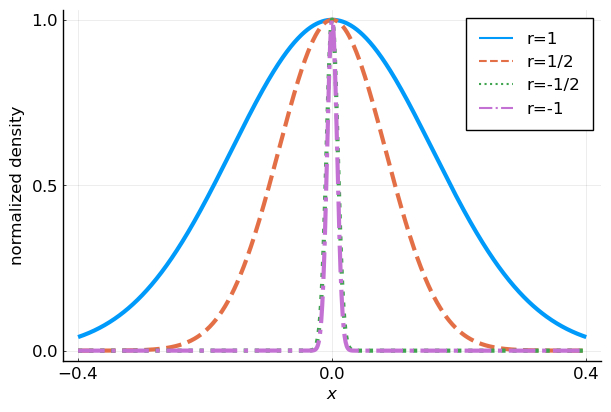

"/Users/janglaubitz/src/2024_priorNormalization_dev/PriorNormalization.jl/notebooks/PDF_cond_prior.pdf"

In [9]:
# Set tick locations and labels
xticks = [-.4, 0, .4]
yticks = [0, 1/2, 1]

# Create the plot
plot_condPrior = plot( x_range, condPrior_values[:,1]./maximum(condPrior_values[:,1]); 
    label="r=1", lw=3, ls=:solid )
plot!( plot_condPrior, x_range, condPrior_values[:,2]./maximum(condPrior_values[:,2]);
    label="r=1/2", lw=3, ls=:dash )
plot!( plot_condPrior, x_range, condPrior_values[:,3]./maximum(condPrior_values[:,3]); 
    label="r=-1/2", lw=3, ls=:dot )
plot!( plot_condPrior, x_range, condPrior_values[:,4]./maximum(condPrior_values[:,4]); 
    label="r=-1", lw=3, ls=:dashdot ) 
# Make some cosmetic changes to the plot 
plot!( plot_condPrior, 
    xlabel=L"x", ylabel="normalized density", # log scale for x-axis and labels 
    tickfontsize=12, labelfontsize=12, legendfontsize=12, # font sizes 
    xticks=xticks, yticks=yticks
)

# Display the plot
#display(plot_condPrior)

# Save the plot 
script_directory = @__DIR__  # Gets the directory of the current script
output_filename = joinpath(script_directory, "PDF_cond_prior.pdf")
savefig(output_filename)

## Contour plot of the joint prior density

In [10]:
# Define the prior density 
function prior(x, θ; r=1.0, β=1.501, ϑ=5*10^(-2)) 
    condPrior_distr = Normal( 0, sqrt(θ)) # distribution - conditional prior 
    hyperPrior_distr = GeneralizedGamma(r, β, ϑ) # distribution - hyper-prior
    condPrior_logPDF = logpdf( condPrior_distr, x ) # log-PDF - conditional prior
    hyperPrior_logPDF = logpdf( hyperPrior_distr, θ ) # log-PDF - hyper-prior 
    logPDF = condPrior_logPDF + condPrior_logPDF # log-PDF - joint prior 
    return exp( logPDF ) # return the PDF 
end

prior (generic function with 1 method)

### Convex prior model: $r=1$

In [18]:
# Generate a grid of values for x and y
i = 1 # convex prior model 
x_range = -0.5:0.01:0.5
θ_range = 0.001:0.001:.1 
 
# Evaluate the log-PDF or PDF at each grid point
prior_values = [prior(x, θ; r=r_range[i], β=β_range[i], ϑ=ϑ_range[i]) for x in x_range, θ in θ_range]

101×100 Matrix{Float64}:
 4.24815e-107  4.11131e-53  3.4158e-35   …  0.126678  0.128671  0.130642
 8.46672e-103  5.80414e-51  9.26113e-34     0.140143  0.142204  0.144238
 1.38157e-98   7.41423e-49  2.349e-32       0.154724  0.156842  0.15893
 1.84573e-94   8.56968e-47  5.57376e-31     0.170474  0.172639  0.174769
 2.01887e-90   8.9626e-45   1.23726e-29     0.187444  0.189642  0.191802
 1.80795e-86   8.48152e-43  2.56934e-28  …  0.205684  0.2079    0.210075
 1.32559e-82   7.26247e-41  4.99147e-27     0.225238  0.227456  0.229629
 7.95739e-79   5.62685e-39  9.07157e-26     0.246148  0.248349  0.250501
 3.91087e-75   3.94473e-37  1.54235e-24     0.26845   0.270615  0.272725
 1.57368e-71   2.5023e-35   2.45319e-23     0.292177  0.294281  0.296327
 5.18445e-68   1.43626e-33  3.65028e-22  …  0.317352  0.319371  0.321328
 1.39839e-64   7.45924e-32  5.08123e-21     0.343994  0.3459    0.347743
 3.08814e-61   3.50533e-30  6.61695e-20     0.372113  0.373877  0.375577
 ⋮                         

In [25]:
surface_prior = surface(x_range, θ_range, prior_values, xlabel=L"x", ylabel=L"\theta",  
    title="Joint Prior", c=:heat, colorbar=false, alpha=0.9 )

# Display surface plots in a single figure
p = plot(surface_prior, size = (600, 600) )